In [81]:
from skimage import io, img_as_ubyte, filters
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.spatial import distance
import cv2
import math
import numpy as np
import random

In [82]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [83]:
#Segmentacja i scalanie obiektów 
def segmentuj(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):
            if img[i][j] != 255.0:
                if img[i][j] == 0.0:
                    img[i][j] = random.randint(1, 250)
                    if img[i-1][j-1] != 0.0 and img[i-1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i-1][j] != 0.0 and img[i-1][j] != 255.0:
                        img[i][j] = img[i-1][j]
                    elif img[i-1][j+1] != 0.0 and img[i-1][j+1] != 255.0:
                        img[i][j] = img[i-1][j+1]
                    elif img[i][j-1] != 0.0 and img[i][j-1] != 255.0:
                        img[i][j] = img[i][j-1]
                    elif img[i][j+1] != 0.0 and img[i][j+1] != 255.0:
                        img[i][j] = img[i][j+1]
                    elif img[i+1][j-1] != 0.0 and img[i+1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i+1][j] != 0.0 and img[i+1][j] != 255.0:
                        img[i][j] = img[i+1][j]
                    elif img[i+1][j+1] != 0.0 and img[i+1][j+1] != 255.0:
                        img[i][j] = img[i+1][j+1]
                    else:
                        continue
                    #scalanie obiektów
                if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255.0:
                    img[i][j] = img[i-1][j-1]
                    
                elif img[i][j] != img[i-1][j] and img[i-1][j] != 255.0:
                    img[i][j] = img[i-1][j]
                    
                elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255.0:
                    img[i-1][j+1] = img[i][j]
                    
                elif img[i][j] != img[i][j-1] and img[i][j-1] != 255.0:
                    img[i][j-1] = img[i][j]
                    
                elif img[i][j] != img[i][j+1] and img[i][j+1] != 255.0:
                    img[i][j+1] = img[i][j]
                    
                elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255.0:
                    img[i][j] = img[i+1][j-1]
                    
                elif img[i][j] != img[i+1][j] and img[i+1][j] != 255.0:
                    img[i][j] = img[i+1][j]
                elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255.0:
                    img[i][j] = img[i+1][j+1]
                else:
                    continue
    return img


def scal(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):   
            if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255:
                img[i][j] = img[i-1][j-1]

            elif img[i][j] != img[i-1][j] and img[i-1][j] != 255:
                img[i][j] = img[i-1][j]

            elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255:
                img[i-1][j+1] = img[i][j]

            elif img[i][j] != img[i][j-1] and img[i][j-1] != 255:
                img[i][j-1] = img[i][j]

            elif img[i][j] != img[i][j+1] and img[i][j+1] != 255:
                img[i][j+1] = img[i][j]

            elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255:
                img[i][j] = img[i+1][j-1]

            elif img[i][j] != img[i+1][j] and img[i+1][j] != 255:
                img[i][j] = img[i+1][j]
            elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255:
                img[i][j] = img[i+1][j+1]
            else:
                continue
                
    return img

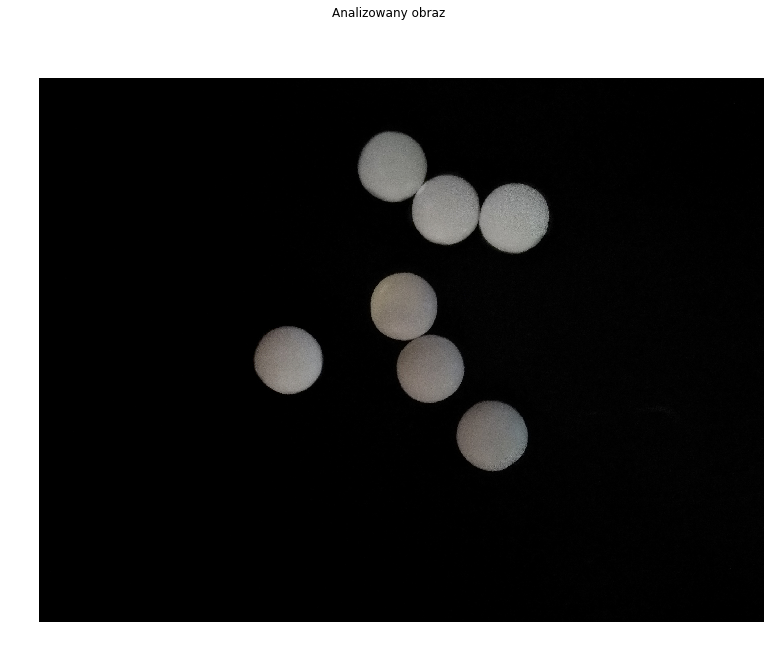

In [87]:
img = io.imread('mentosy/img4.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.suptitle('Analizowany obraz')
plt.show()

In [88]:
def ile_procent(img):
    obiekt = 0
    tlo = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 255:
                obiekt += 1
            elif img[i][j] == 0:
                tlo += 1
    return (obiekt/tlo)*100

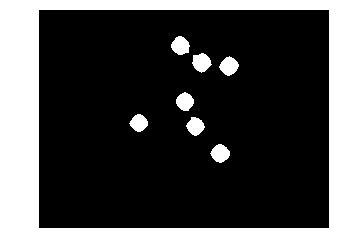

Obiekty na tym obrazie zajmują: 7.01 %


In [127]:
th = 150
image = img_as_ubyte(rgb2gray(img))
th, bimm = cv2.threshold(image, thresh=th, maxval=255, type=cv2.THRESH_OTSU)
mbim = cv2.medianBlur(bimm,  11)

kernel = np.ones((3,3),np.uint8)
erodeBin = cv2.erode(mbim, kernel=kernel, iterations=25)

plt.imshow(erodeBin, cmap="gray")
plt.axis('off')
plt.show()
ile = ile_procent(mbim)
print('Obiekty na tym obrazie zajmują: %.2f' % ile, "%")

dt = cv2.distanceTransform(mbim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)
th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)
bimm = cv2.erode(bim, kernel=kernel, iterations=25)

In [121]:
#Liczenie ilości obiektów na obrazie
def licz_obiekty(img):
    ile_obiektow = 0
    obiekty = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != 255:
                obiekty.append(img[i][j])
    ile_obiektow = len(list(set(obiekty)))# zlicza niepowtarzające się elementy listy
    return ile_obiektow

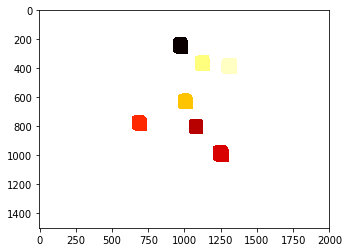

Obiektów jest:	 7


In [122]:
nimg = segmentuj(bimm)
tmp = 0
ile = licz_obiekty(nimg)
#print(ile)
while tmp != ile:
    #print(tmp)
    #nimg = scal(nimg)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    #print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()
    
print("Obiektów jest:\t", ile)

Prog binaryzacji:  61.0


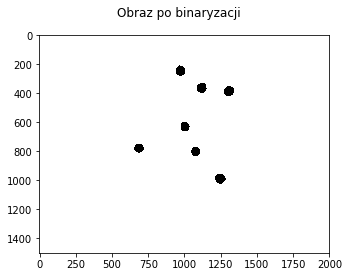

In [128]:
print('Prog binaryzacji: ', th)


binary = bim < th

plt.imshow(binary, cmap='binary')
plt.axis('on')
plt.suptitle('Obraz po binaryzacji')
plt.show()

In [129]:
label_objects, nb_labels = ndi.label(binary)

sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

figures = mask_sizes[label_objects]

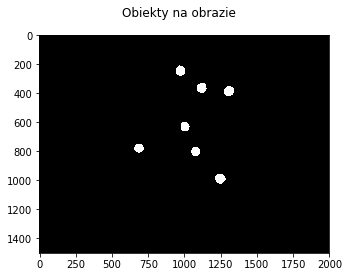

(1500, 2000)
(1500, 2000)
7


In [130]:
plt.imshow(figures, cmap="gray")
plt.axis('on')
plt.suptitle('Obiekty na obrazie')
plt.show()

print(figures.shape)
print(label_objects.shape)
print(nb_labels)

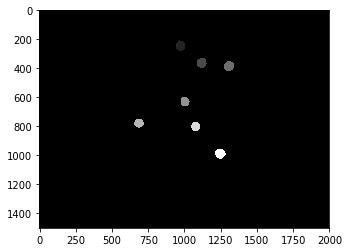

[2975368    3640    3700    3908    3245    3156    3159    3824] [False  True  True  True  True  True  True  True]
0
0
0
3000000 (1500, 2000)
3700


In [131]:
plt.imshow(label_objects,cmap='gray')
plt.show()

mask_sizes
print(sizes, mask_sizes)
print(label_objects[250][300])
print(label_objects[100][400])
print(label_objects[100][100])
print (label_objects.size, label_objects.shape)
print(np.sum(label_objects == 2))

In [132]:
no_of_object = 2

def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects, i+1))

print(cogs)

[(244, 974), (363, 1122), (385, 1310), (630, 1005), (778, 689), (801, 1079), (987, 1250)]


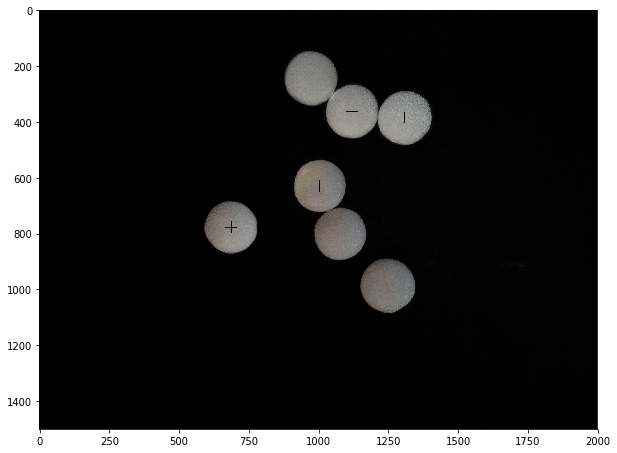

In [133]:
def drawMarkers(image, coords):

    image = np.copy(image)
    
    for item in coords:
        y,x = item
        for j in range(y-21, y+20):
            image[j,x] = 0
        for i in range(x-21, x+20):
            image[y,i] = 0
            
    return image


lo = drawMarkers(img, cogs)
plt.figure(figsize=(10,10))
plt.imshow(lo,cmap='hot')
plt.show()

In [134]:
cogs2 = sorted(cogs, key=itemgetter(0,1))
print(cogs2)

from numpy.linalg import norm
cogs3 = sorted(cogs, key=lambda tup: norm(tup))
print(cogs3)

for item in cogs3:
    print(norm(item))

[(244, 974), (363, 1122), (385, 1310), (630, 1005), (778, 689), (801, 1079), (987, 1250)]
[(244, 974), (778, 689), (363, 1122), (630, 1005), (801, 1079), (385, 1310), (987, 1250)]
1004.0976048173803
1039.2328901646638
1179.2595134235721
1186.138693408153
1343.8162076712722
1365.4028709505485
1592.6923745657855


In [135]:
p1 = 0
p2 = 1

print(cogs3[p1], cogs3[p2])
print(label_objects.shape[0])

(244, 974) (778, 689)
1500


In [136]:
y = cogs3[p1][0] - cogs3[p2][0]
x = cogs3[p1][1] - cogs3[p2][1]
print(x,y)

angle = math.degrees(math.atan2(-y, x)) + 180

print(int(angle))

285 -534
241


In [137]:
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)

7


In [138]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))

3640
3700
3908
3245
3156
3159
3824


In [139]:
def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]


for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts))

Liczba punktow:  3640  Srodek ciezkosci:  [244.91346153846155, 974.8260989010989]
Liczba punktow:  3700  Srodek ciezkosci:  [363.3810810810811, 1122.3583783783783]
Liczba punktow:  3908  Srodek ciezkosci:  [385.87947799385876, 1310.475690890481]
Liczba punktow:  3245  Srodek ciezkosci:  [630.0459167950694, 1005.9063174114021]
Liczba punktow:  3156  Srodek ciezkosci:  [778.1777566539924, 689.0114068441064]
Liczba punktow:  3159  Srodek ciezkosci:  [801.6410256410256, 1079.4153213042102]
Liczba punktow:  3824  Srodek ciezkosci:  [987.2154811715482, 1250.076359832636]


In [140]:
def computeBB(points):
    
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

In [141]:
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)

In [142]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    
    print('Liczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nBlair-Bliss: ', bb,'\nFeret: ',feret, '\n---\n')

Liczba punktow:  3640 
Srodek ciezkosci:  [244.91346153846155, 974.8260989010989] 
Blair-Bliss:  0.9973546045892804 
Feret:  1.0923076923076922 
---

Liczba punktow:  3700 
Srodek ciezkosci:  [363.3810810810811, 1122.3583783783783] 
Blair-Bliss:  0.9982891928536926 
Feret:  1.0454545454545454 
---

Liczba punktow:  3908 
Srodek ciezkosci:  [385.87947799385876, 1310.475690890481] 
Blair-Bliss:  0.9973155648729624 
Feret:  0.9583333333333334 
---

Liczba punktow:  3245 
Srodek ciezkosci:  [630.0459167950694, 1005.9063174114021] 
Blair-Bliss:  0.9991067120166558 
Feret:  1.0327868852459017 
---

Liczba punktow:  3156 
Srodek ciezkosci:  [778.1777566539924, 689.0114068441064] 
Blair-Bliss:  0.9990997245136684 
Feret:  0.984375 
---

Liczba punktow:  3159 
Srodek ciezkosci:  [801.6410256410256, 1079.4153213042102] 
Blair-Bliss:  0.9990493289699672 
Feret:  1.032258064516129 
---

Liczba punktow:  3824 
Srodek ciezkosci:  [987.2154811715482, 1250.076359832636] 
Blair-Bliss:  0.99744736659527